In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


In [2]:
# Write a class for perceptron with fit and predict function with sigmoid activation function
class Perceptron:
    def __init__(self, learning_rate=0.01, n_iter=100):
        self.lr = learning_rate
        self.n_iter = n_iter

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        self.errors_ = []
        self.w_ = np.zeros(X.shape[1])
        self.b_ = 0

        for _ in range(self.n_iter):
            linear_output = np.dot(X, self.w_) + self.b_
            y_pred = self.sigmoid(linear_output)

            errors = y - y_pred
            self.w_ += self.lr * np.dot(errors, X)
            self.b_ += self.lr * errors.sum()

            # Count misclassifications
            y_pred_class = np.where(y_pred >= 0.5, 1, -1)
            self.errors_.append(np.sum(y_pred_class != y))
        return self

    def predict(self, X):
        linear_output = np.dot(X, self.w_) + self.b_
        return np.where(self.sigmoid(linear_output) >= 0.5, 1, -1)


In [3]:
# Start your main here ,read the iris data set
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data",
                 header=None)

In [4]:
# map the labels to a binary integer value
df.columns = ['sepal_length','sepal_width','petal_length','petal_width','class']
df = df[df['class'].isin(['Iris-setosa','Iris-versicolor'])]  # Binary classification

X = df[['sepal_length','sepal_width','petal_length','petal_width']].values
y = np.where(df['class'] == 'Iris-setosa', 1, -1)



In [5]:

# standardization of the input features
X = (X - X.mean(axis=0)) / X.std(axis=0)





In [6]:
# split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


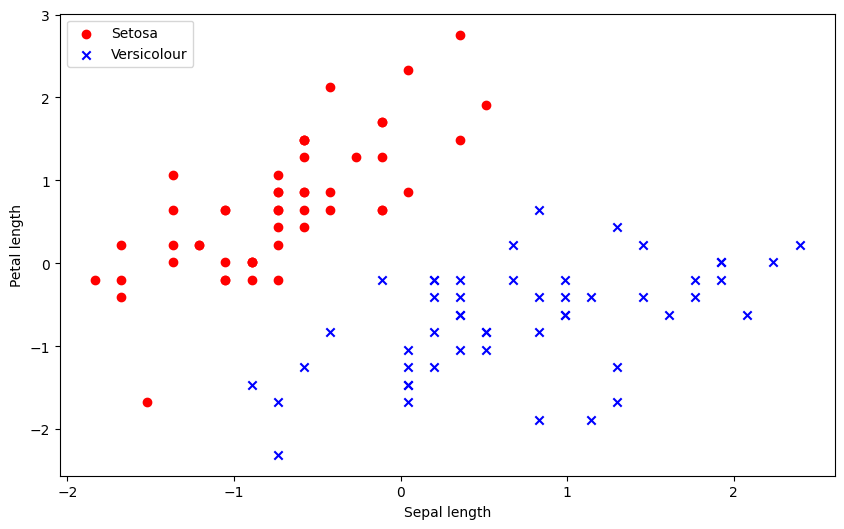

In [7]:
# train the model by setting the learning rate as 0.01
model = Perceptron(learning_rate=0.01, n_iter=50)
model.fit(X_train, y_train)
plt.figure(figsize=(10,6))
plt.scatter(X[:50, 0], X[:50, 1], color='red', marker='o', label='Setosa')
plt.scatter(X[50:100, 0], X[50:100, 1], color='blue', marker='x', label='Versicolour')
plt.xlabel("Sepal length")
plt.ylabel("Petal length")
plt.legend(loc='upper left')
plt.show()


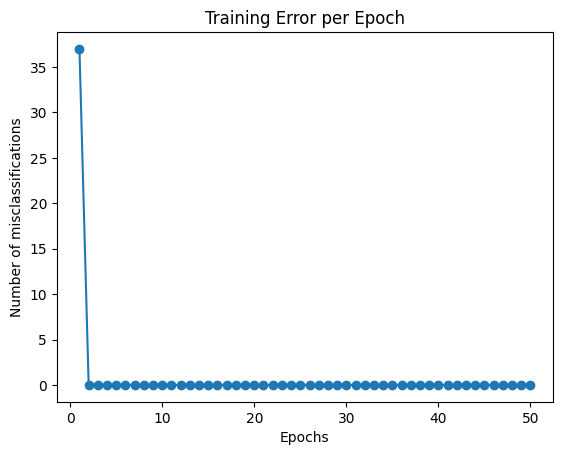

In [8]:
# plot the number of errors during each iteration
plt.plot(range(1, len(model.errors_)+1), model.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of misclassifications')
plt.title('Training Error per Epoch')
plt.show()


In [11]:
# print the accuracy
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on test set: {accuracy:.4f}")

Accuracy on test set: 1.0000
